In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import string

In [2]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Rejoin tokens into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [3]:
df = pd.read_csv('datasets/subreddit_data.csv')
df

,Subreddit,Title,Body/Text,Author,Score,Creation Time,Number of Comments,URL,Flair,Upvotes,Downvotes,Upvote Ratio
0,mentalhealth,I hate going outside.,Summer is here in my city and i've not been do...,caledenx,2,2023-06-03 17:59:54,0,https://www.reddit.com/r/mentalhealth/comments...,Venting,2,0,1.00
1,mentalhealth,How do I be myself around people that I haven'...,I've always been a shy person. A bit more intr...,bradtohostmemereview,1,2023-06-03 17:58:50,0,https://www.reddit.com/r/mentalhealth/comments...,Need Support,1,0,1.00
2,mentalhealth,I've let my problems get the better of me,I've had a fuxked up past. Parents abusive of ...,coffeeanddissociate,1,2023-06-03 17:56:11,0,https://www.reddit.com/r/mentalhealth/comments...,Venting,1,0,1.00
3,mentalhealth,Finally trying to get back on track,"This past weekend, I had one of the most inten...",YourParadise98,1,2023-06-03 17:51:18,0,https://www.reddit.com/r/mentalhealth/comments...,NaN,1,0,1.00
4,mentalhealth,Residential treatment,I’m going to be staying at a residential facil...,Commission-Exact,1,2023-06-03 17:47:17,0,https://www.reddit.com/r/mentalhealth/comments...,NaN,1,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
74183,ADHDsupport,First few days on 27mg Concerta and hating it,I need some advice. I'm 30 years old and was j...,Danger_17,2,2014-10-07 15:27:27,2,https://www.reddit.com/r/ADHDSupport/comments/...,NaN,2,0,1.00
74184,ADHDsupport,Android Phone? Google Keep,NaN,rabidbob,3,2014-09-09 04:05:37,0,http://www.reddit.com/r/ADHD/comments/2fu4iw/f...,NaN,3,0,1.00
74185,ADHDsupport,Lionflower13's 5 every day things for success ...,NaN,rabidbob,2,2014-09-09 04:02:44,0,http://www.reddit.com/r/ADHD/comments/2fq446/f...,NaN,2,0,1.00
74186,ADHDsupport,The Secret Weapon: Evernote as an organisation...,NaN,rabidbob,3,2014-09-09 03:52:54,4,http://www.thesecretweapon.org/,NaN,2,1,0.81


In [4]:
df.shape

(74188, 12)

In [5]:
# Data Overview
num_posts = len(df)
num_subreddits = len(df['Subreddit'].unique())
time_range = f"{df['Creation Time'].min()} to {df['Creation Time'].max()}"
print(f"Total Posts: {num_posts}")
print(f"Total Subreddits: {num_subreddits}")
print(f"Time Range: {time_range}")

Total Posts: 74188
Total Subreddits: 98
Time Range: 2009-01-14 11:54:02 to 2023-06-03 19:18:43


In [6]:
df.isnull().mean()

Subreddit             0.000000
Title                 0.000000
Body/Text             0.144080
Author                0.000000
Score                 0.000000
Creation Time         0.000000
Number of Comments    0.000000
URL                   0.000000
Flair                 0.578962
Upvotes               0.000000
Downvotes             0.000000
Upvote Ratio          0.000000
dtype: float64

In [7]:
df = df.dropna(subset=['Body/Text'])
df.isnull().mean()

Subreddit             0.000000
Title                 0.000000
Body/Text             0.000000
Author                0.000000
Score                 0.000000
Creation Time         0.000000
Number of Comments    0.000000
URL                   0.000000
Flair                 0.553316
Upvotes               0.000000
Downvotes             0.000000
Upvote Ratio          0.000000
dtype: float64

In [8]:
df.shape

(63499, 12)

In [9]:
df.duplicated().sum()

363

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
# Data Overview
num_posts = len(df)
num_subreddits = len(df['Subreddit'].unique())
time_range = f"{df['Creation Time'].min()} to {df['Creation Time'].max()}"
print(f"Total Posts: {num_posts}")
print(f"Total Subreddits: {num_subreddits}")
print(f"Time Range: {time_range}")

Total Posts: 63136
Total Subreddits: 97
Time Range: 2010-12-13 18:48:02 to 2023-06-03 19:18:43


In [13]:
df.shape

(63136, 12)

In [14]:
df.loc[:, 'processed_text'] = df['Body/Text'].apply(preprocess_text)
df['processed_text']

0        summer city 've well mentally 'm nurse work 12...
1        've always shy person bit introverted extrover...
2        've fuxked past parent abusive childhood negle...
3        past weekend one intense mental breakdown 've ...
4        ’ going staying residential facility 30-45 day...
                               ...                        
74180    feel terrible even saying something like 'm nu...
74181    advice request tl dr get parent/child dynamic ...
74182    subject brief online study student diagnosed l...
74183    need advice 'm 30 year old diagnosed adhd pres...
74187    anyone find add hold hand dyslexia dyslexic ty...
Name: processed_text, Length: 63136, dtype: object

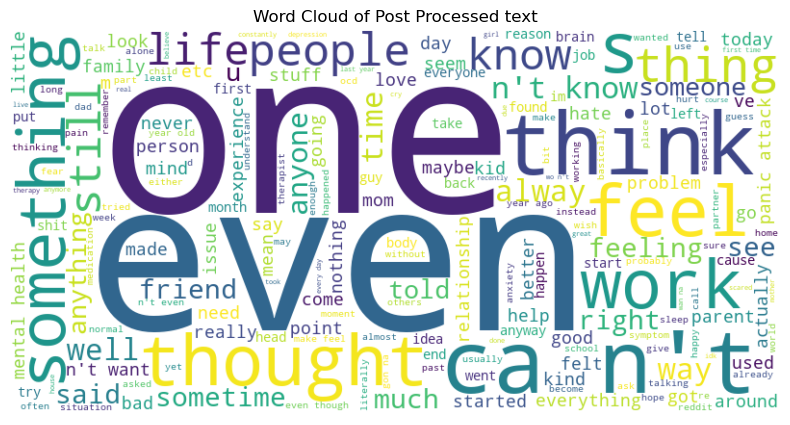

In [15]:
# Word Cloud of Post Processed text

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Post Processed text")
plt.show()

C:\Users\neele\AppData\Local\Temp\ipykernel_6792\3339164879.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


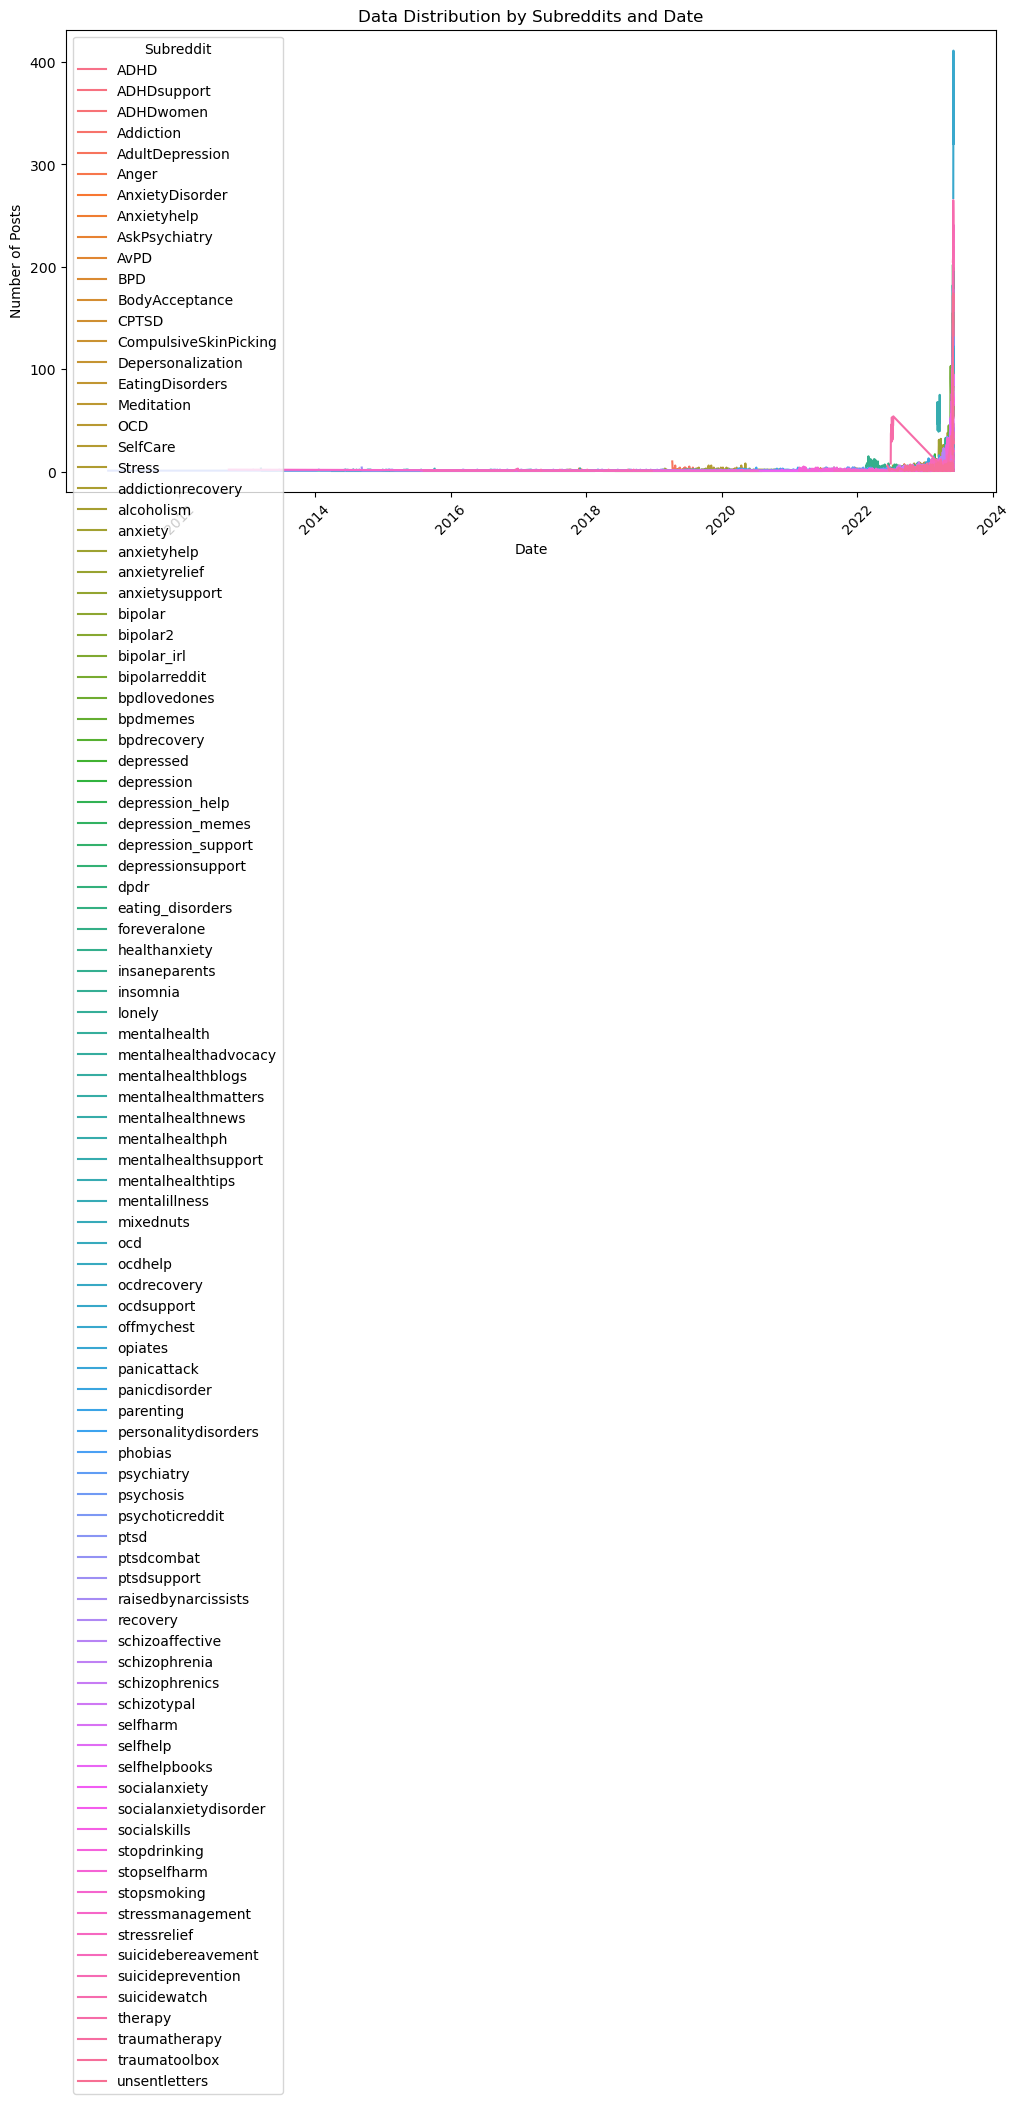

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Creation Time' column to datetime with day-first format
try:
    df['Creation Time'] = pd.to_datetime(df['Creation Time'], dayfirst=True)
except pd.errors.OutOfBoundsDatetime as e:
    non_convertible_values = df.loc[pd.to_datetime(df['Creation Time'], errors='coerce', dayfirst=True).isna(), 'Creation Time']
    print("Error: Non-convertible values in 'Creation Time' column:")
    print(non_convertible_values)

# Set 'Creation Time' as the index
df.set_index('Creation Time', inplace=True)

# Group the data by subreddit and date to get the count of posts
try:
    grouped_data = df.groupby(['Subreddit', pd.Grouper(freq='D')]).size().reset_index(name='Post Count')
except KeyError:
    print("Error: 'Creation Time' column not found")

# Plot the data distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x='Creation Time', y='Post Count', hue='Subreddit', data=grouped_data)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Data Distribution by Subreddits and Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
